In [1]:
import os
from datetime import datetime
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
from sciopy import EIT_16_32_64_128, EitMeasurementSetup

In [2]:
n_el = 16
sciospec = EIT_16_32_64_128(n_el)

In [3]:
sciospec.connect_device_HS()

In [4]:
sciospec.SystemMessageCallback()

No message inside the message buffer
message buffer:
 []
message length:	 0


In [10]:
setup = EitMeasurementSetup(
    burst_count=40,
    n_el=n_el,
    exc_freq=125_000,
    framerate=10,
    amplitude=0.01,
    inj_skip=n_el // 2,
    gain=1,
    adc_range=1,
)

In [11]:
sciospec.SetMeasurementSetup(setup)

Command-Acknowledge: Command has been executed successfully
message buffer:
 ['0x18', '0x1', '0x83', '0x18']
message length:	 4
Command-Acknowledge: Command has been executed successfully
message buffer:
 ['0x18', '0x1', '0x83', '0x18']
message length:	 4
Command-Acknowledge: Command has been executed successfully
message buffer:
 ['0x18', '0x1', '0x83', '0x18']
message length:	 4
Command-Acknowledge: Command has been executed successfully
message buffer:
 ['0x18', '0x1', '0x83', '0x18']
message length:	 4


In [12]:
sciospec.SystemMessageCallback()

In [13]:
crr_ts = datetime.now()
frm_ts = crr_ts.strftime("%Y-%m-%d %H:%M:%S")

print("Timestamp raw:", crr_ts)
print("Timestamp formatted:", frm_ts)

Timestamp raw: 2024-12-03 13:35:11.554439
Timestamp formatted: 2024-12-03 13:35:11


In [25]:
pot_mat = sciospec.StartStopMeasurement()

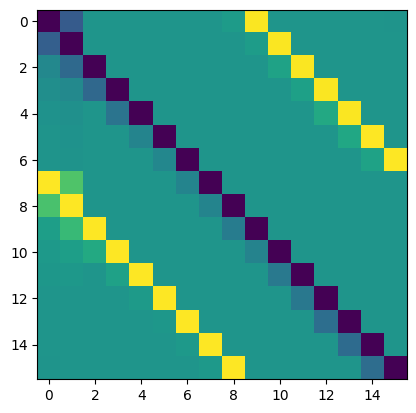

In [27]:
plt.imshow(pot_mat[10, :, :].imag)

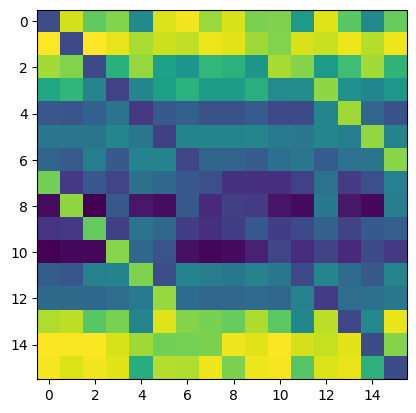

In [34]:
plt.imshow(np.mean(pot_mat, axis=0).real)

In [50]:
meas_num = len(glob("data/measurement_franzi_*"))
try:
    s_path = f"data/measurement_franzi_{meas_num}"
    os.mkdir(s_path)
    print(f"{s_path=}")
except e:
    print(e)

s_path='data/measurement_franzi_1'


In [53]:
s_idx = 0

## Measurements

- 15 participants
- konzentrische Bewegung mit unterschiedlichen Kraftniveaus
- 20, 30, ... 80, NM -> 8 Kategorien
- geshufflete Kraftkurven
- ein Protokoll möglich
- Standartisierte Probevorgänge (klein, mittel, hoch) immer identisch
- wie viele Messungen pro sekunde möglich?

In [52]:
NMs = np.arange(20, 81, 10)
np.random.shuffle(NMs)
NMs = np.repeat(NMs, 2)

print(NMs)

[20 20 70 70 40 40 80 80 50 50 30 30 60 60]


In [68]:
NM = NMs[s_idx]
print("Measurement", s_idx, "with", NM, "NM")
crr_ts = datetime.now()
pot_mat = sciospec.StartStopMeasurement()
np.savez(
    s_path + "/sample_{0:06d}.npz".format(s_idx),
    timestamp=crr_ts,
    pot_mat=pot_mat,
    nm=NM,
)
s_idx += 1

Measurement 13 with 60 NM


In [69]:
s_idx * 40

560

[30 30 70 70 60 60 80 80 40 40 20 20 50 50]
